In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [459]:
# Mengatur opsi untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

df = pd.read_csv(r'D:\DATA PELATIHAN\df_arabica_clean.csv')

del df['Unnamed: 0']
del df['ID']
del df['Lot Number']
del df['ICO Number']
del df["Mill"]
del df["Sweetness"]
del df["Clean Cup"]
del df["Defects"]
del df['Grading Date']
del df['Certification Body']
del df['Certification Address']
del df['Certification Contact']

df

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration
0,Colombia,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023"
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023"
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023"
3,Costa Rica,La Cumbre,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023"
4,Colombia,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,Fazenda Conquista,Ipanema Coffees,950,Sul de Minas,Ipanema Coffees,2240,60 kg,Brazil Specialty Coffee Association,2022 / 2023,Ipanema Coffees,Mundo Novo,Completed,Natural / Dry,7.17,7.17,6.92,7.17,7.42,7.17,10.0,7.08,80.08,11.4,0,0,green,4,"February 2nd, 2024"
203,Nicaragua,Finca San Felipe,Exportadora Atlantic S.A,1200,Matagalpa,Exportadora Atlantic S.A.,300,30 kg,Asociación de Cafés Especiales de Nicaragua,2022 / 2023,"Exportadora Atlantic, S.A.",SHG,Completed,Natural / Dry,7.33,7.08,6.75,7.17,7.42,7.17,10.0,7.08,80.00,10.4,0,2,green,12,"March 2nd, 2024"
204,Laos,-,Marubeni Corporation,1300,Bolaven Plateau,"LAO MINH TIEN COFFEE SOLE CO.,LTD",343,60 kg,Japan Coffee Exchange,2021 / 2022,Ikuto Uehara,Catimor,Completed,Washed / Wet,7.25,7.17,7.08,7.00,7.08,7.08,10.0,7.00,79.67,11.6,0,9,green,11,"November 11th, 2023"
205,El Salvador,"Rosario de Maria II, Area de La Pila",Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",Roselia Yglesias,1,2 kg,Salvadoran Coffee Council,2023,Roselia Yglesias,Maragogype,Completed,Natural / Dry,6.50,6.75,6.75,7.17,7.08,7.00,10.0,6.83,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024"


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             205 non-null    object 
 2   Company               207 non-null    object 
 3   Altitude              206 non-null    object 
 4   Region                205 non-null    object 
 5   Producer              206 non-null    object 
 6   Number of Bags        207 non-null    int64  
 7   Bag Weight            207 non-null    object 
 8   In-Country Partner    207 non-null    object 
 9   Harvest Year          207 non-null    object 
 10  Owner                 207 non-null    object 
 11  Variety               201 non-null    object 
 12  Status                207 non-null    object 
 13  Processing Method     202 non-null    object 
 14  Aroma                 207 non-null    float64
 15  Flavor                2

In [461]:
for column in df.columns:
    Unique_values = len(df[column].unique())
    print(f"{column}: {Unique_values} distinct values")

Country of Origin: 22 distinct values
Farm Name: 173 distinct values
Company: 72 distinct values
Altitude: 98 distinct values
Region: 121 distinct values
Producer: 173 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 21 distinct values
Harvest Year: 7 distinct values
Owner: 80 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 11 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Overall: 21 distinct values
Total Cup Points: 81 distinct values
Moisture Percentage: 46 distinct values
Category One Defects: 6 distinct values
Quakers: 11 distinct values
Color: 12 distinct values
Category Two Defects: 14 distinct values
Expiration: 75 distinct values


## Mengubah format kolom "Harvest Year" dan "Expiration"

In [462]:
df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()

In [463]:
from dateutil import parser

df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(parser.parse)

In [464]:
df['Diference_day'] = (pd.to_datetime(df['Expiration']) - pd.to_datetime(df['Harvest Year'])).dt.days

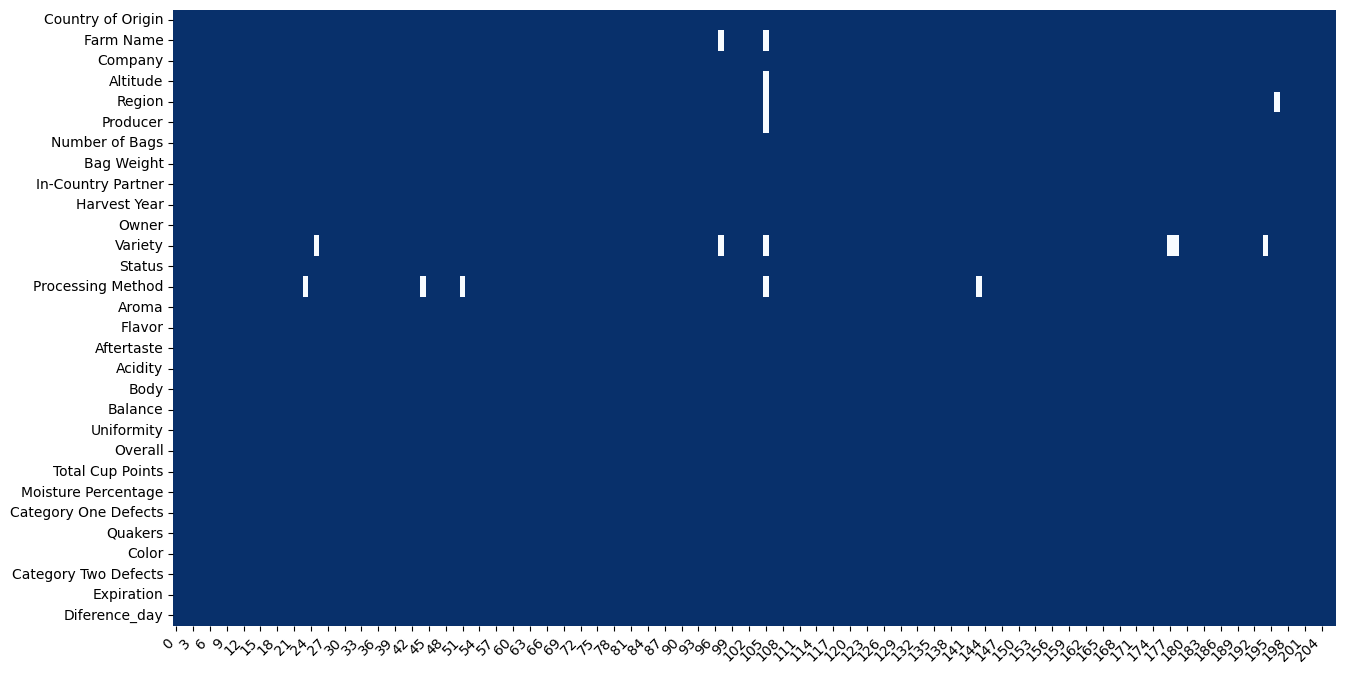

In [465]:
from jcopml.plot import plot_missing_value

plot_missing_value(df)

## Mengatasi Missing Value

### 1. Mengatasi missing value pada Kolom "Farm Name"

In [466]:
df[pd.isna(df['Farm Name'])]

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Diference_day
97,Colombia,NaN,Marubeni Corporation,1411,Pereira,RACAFE & CIA SCA,375,70 kg,Japan Coffee Exchange,2022-01-01,Ikuto Uehara,NaN,Completed,Washed / Wet,7.67,7.75,7.67,7.75,7.67,7.67,10.0,7.67,83.83,11.9,0,1,green,1,2024-04-16,836
105,Colombia,NaN,Coffee Quality Institute,NaN,NaN,NaN,1,1 kg,Barista and Coffee Academy of Asia,2022-01-01,Coffee Quality Institute,NaN,Completed,NaN,7.83,7.75,7.50,7.58,7.67,7.67,10.0,7.67,83.67,12.4,1,0,greenish,9,2023-09-26,633


In [467]:
df.loc[df.index == 105, 'Farm Name'] = 'Hacienda Vanicia'
df.loc[df.index == 97, 'Farm Name'] = 'Finca Samaria'

### 2. Mengatasi Missing value Kolom "Altitude"

In [468]:
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Apply the function to clean and calculate the mean for each value in the "Altitude" column
df['Altitude'] = df['Altitude'].apply(clean_altitude_range)

In [469]:
df[pd.isna(df['Altitude'])]

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Diference_day
99,Guatemala,SAN RAFAEL URIAS VALDES,Asociación Nacional del Cafe,NaN,ANTIGUA GUATEMALA,"VALBROS, S. A.",635,30 kg,Asociacion Nacional Del Café,2021-01-01,Angelica Paola Citan Lopez,Bourbon,Completed,Washed / Wet,7.58,7.92,7.50,7.67,7.75,7.67,10.0,7.75,83.83,10.9,0,1,greenish,4,2023-05-19,868
105,Colombia,Hacienda Vanicia,Coffee Quality Institute,NaN,NaN,NaN,1,1 kg,Barista and Coffee Academy of Asia,2022-01-01,Coffee Quality Institute,NaN,Completed,NaN,7.83,7.75,7.50,7.58,7.67,7.67,10.0,7.67,83.67,12.4,1,0,greenish,9,2023-09-26,633
180,Guatemala,MULTIPLE SMALLHOLDER FARMS,"HARU International Corp, 守成咖啡",NaN,Antigua,La Minita,540,30 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2022-01-01,Anderson Wong,Caturra,Completed,Washed / Wet,7.33,7.42,7.33,7.42,7.58,7.42,10.0,7.42,81.92,10.3,0,0,greenish,1,2023-11-03,671


In [470]:
df.loc[df.index == 99, 'Altitude'] = '1500.0'
df.loc[df.index == 105, 'Altitude'] = '1500.0'
df.loc[df.index == 180, 'Altitude'] = '1500.0'

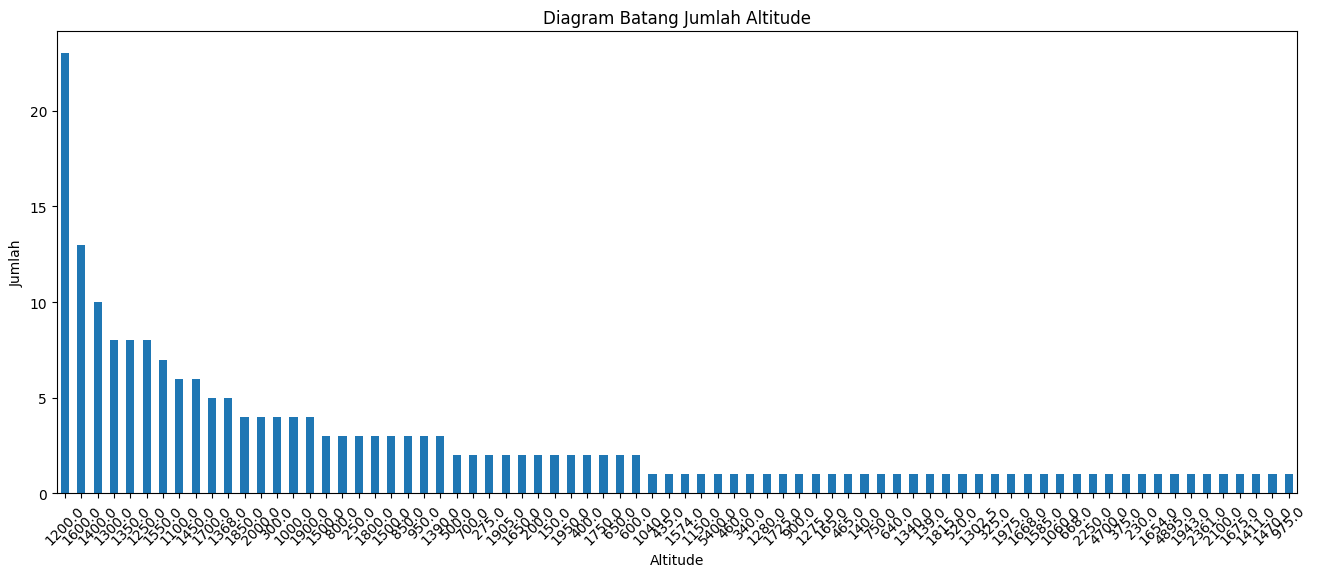

In [471]:
plt.figure(figsize=(16, 6))

# Membuat diagram batang
df['Altitude'].value_counts().plot.bar()

# Mengatur judul diagram dan label sumbu-sumbu
plt.title('Diagram Batang Jumlah Altitude')
plt.xlabel('Altitude')
plt.ylabel('Jumlah')

# Mengatur rotasi label sumbu X
plt.xticks(rotation=45)

# Menampilkan diagram
plt.show()


### 3. Mengatasi Missing value kolom 'Ragion'

In [472]:
df[pd.isna(df["Region"])]

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Diference_day
105,Colombia,Hacienda Vanicia,Coffee Quality Institute,1500.0,NaN,NaN,1,1 kg,Barista and Coffee Academy of Asia,2022-01-01,Coffee Quality Institute,NaN,Completed,NaN,7.83,7.75,7.50,7.58,7.67,7.67,10.0,7.67,83.67,12.4,1,0,greenish,9,2023-09-26,633
196,Nicaragua,EXPORTADORA ATLANTIC S.A,ISHIMITSU,1100.0,NaN,Varios Productores,275,69 kg,Japan Coffee Exchange,2021-01-01,丸山花織,Caturra,Completed,Washed / Wet,7.25,7.25,7.17,7.33,7.08,7.25,10.0,7.17,80.50,11.5,0,1,greenish,3,2023-07-11,921


In [473]:
df.loc[df.index == 105, 'Region'] = 'Pereira'
df.loc[df.index == 196, 'Region'] = "Jinotega"

### 4. Mengatasi missing value kolom "Processing Method"

<Axes: >

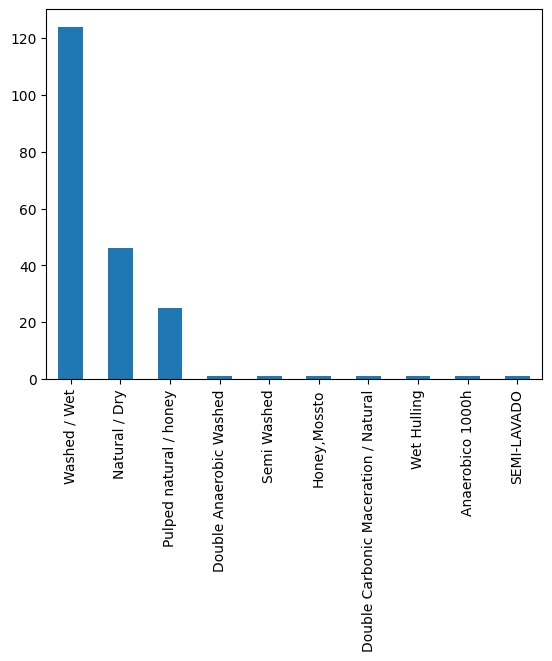

In [474]:
df['Processing Method'].value_counts().plot.bar()

In [475]:
df[pd.isna(df['Processing Method'])]

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Diference_day
23,Colombia,El Diamante,Coffee Quality Union,1350.0,Quindio,Farm Bedoya Arango,6,5 kg,Japan Coffee Exchange,2022-01-01,Coffee Quality Union,Castillo Paraguaycito,Completed,NaN,8.08,8.00,7.83,8.17,7.75,7.83,10.0,8.00,85.67,11.3,0,0,brownish,2,2024-04-06,826
44,Taiwan,愛姬咖啡莊園iGfarm,Taiwan Coffee Laboratory,150.0,壽豐鄉Shoufeng Township,劉孟宗 LIU MENG TSUNG,1,50 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021-01-01,Liu Meng Tsung劉孟宗,Typica,Completed,NaN,7.92,8.00,7.92,8.00,7.58,7.75,10.0,7.83,85.00,10.9,0,0,green,0,2023-12-12,1075
51,Indonesia,PT Indo CafCo North Sumatera,InterAmerican Coffee,1200.0,Aceh Tengah,PT Indo CafCo North Sumatera,320,60 kg,NKG Quality Service (a division of Bernhard Ro...,2022-01-01,Charles Umeano,Catimor,Completed,NaN,7.83,7.92,7.75,7.83,7.83,7.83,10.0,7.83,84.83,11.9,0,3,bluish-green,2,2023-09-23,630
105,Colombia,Hacienda Vanicia,Coffee Quality Institute,1500.0,Pereira,NaN,1,1 kg,Barista and Coffee Academy of Asia,2022-01-01,Coffee Quality Institute,NaN,Completed,NaN,7.83,7.75,7.50,7.58,7.67,7.67,10.0,7.67,83.67,12.4,1,0,greenish,9,2023-09-26,633
143,Taiwan,嵩岳咖啡莊園,宸嶧國際有限公司,1200.0,"Shibi, Gukeng Township, Yunlin County 郵遞區號 , T...",郭亮志,300,1 kg,Blossom Valley International宸嶧國際,2022-01-01,郭亮志 GuoLiangZhi,Gesha,Completed,NaN,7.67,7.50,7.42,7.75,7.42,7.58,10.0,7.58,82.92,10.2,0,0,yellow-green,0,2023-10-24,661


In [476]:
df.loc[df.index == 23, 'Processing Method'] = 'Washed / Wet'
df.loc[df.index == 44, 'Processing Method'] = 'Washed / Wet'
df.loc[df.index == 51, 'Processing Method'] = 'Washed / Wet'
df.loc[df.index == 105, 'Processing Method'] = 'Washed / Wet'
df.loc[df.index == 143, 'Processing Method'] = 'Washed / Wet'

C:\Users\Asani\AppData\Local\Temp\ipykernel_5864\1738849441.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



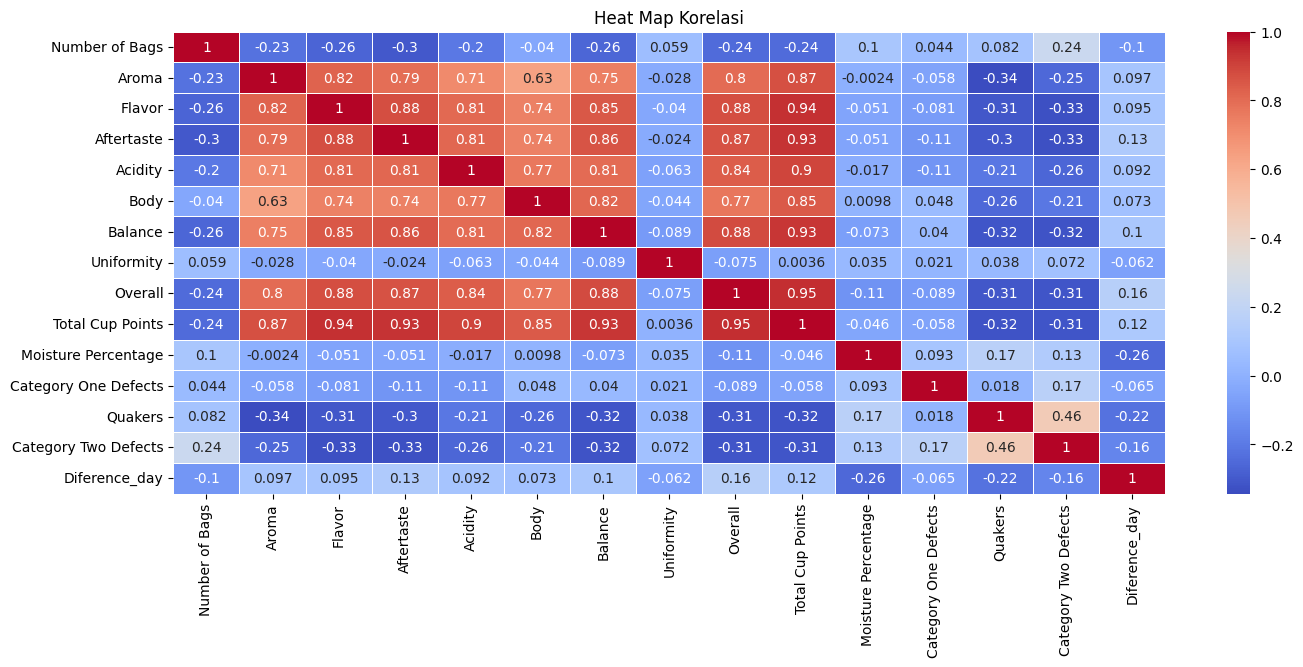

In [477]:
# Menghitung korelasi antara kolom-kolom pada DataFrame rating_counts
correlation_matrix = df.corr()

# Membuat heat map dari matriks korelasi
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map Korelasi')
plt.show()

## Melakukan Analisis Berdasarkan 'Processing Method'

In [478]:
df = df.groupby('Processing Method').filter(lambda x: len(x) > 1)

In [479]:
fig = px.scatter(df, x='Aftertaste', y='Acidity', color='Processing Method',
                 labels={'Aftertaste': 'After taste', 'Acidity': 'Keasaman', 'Processing Method': 'Processing Method'},
                 title='Hubungan  After taste, Keasaman berdasarkan Processing Method')

fig.update_traces(
    marker=dict(size=10),
    selector=dict(mode='markers')
)

fig.show()

In [480]:
fig = px.scatter(df, x='Aroma', y='Flavor', color='Processing Method',
                 labels={'Aroma': 'Aroma', 'Flavor': 'Flavor', 'Processing Method': 'Processing Method'},
                 title='Hubungan  Aroma, Flavor berdasarkan Processing Method')

fig.update_traces(
    marker=dict(size=10),
    selector=dict(mode='markers')
)

fig.show()

In [481]:
fig = px.scatter(df, x='Body', y='Balance', color='Processing Method',
                 labels={'Body': 'Body', 'Balance': 'Balance', 'Processing Method': 'Processing Method'},
                 title='Hubungan Body, Belance berdasarkan Processing Method')

fig.update_traces(
    marker=dict(size=10),
    selector=dict(mode='markers')
)

fig.show()

In [482]:
fig = px.scatter(df, x='Overall', y='Total Cup Points', color='Processing Method',
                 labels={'Overall': 'Overall', 'Totals Cup Points': 'Totals Cup Points', 'Processing Method': 'Processing Method'},
                 title='Hubungan Overall, Total Cup Points berdasarkan Processing Method')

fig.update_traces(
    marker=dict(size=10),
    selector=dict(mode='markers')
)

fig.show()

In [484]:
fig = px.scatter(df, x='Diference_day', y='Processing Method',
                 labels={'Diference_day': 'Diference_day','Processing Method': 'Processing Method'},
                 title='hari kadaluarsa dan  Processing Method')

fig.update_traces(
    marker=dict(size=10),
    selector=dict(mode='markers')
)

fig.show()